# This doc contain lending club case study for loan defaulter prediction

Project Content:


Importing required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Reading the loan CSV file

In [4]:
df = pd.read_csv("data/loan.csv")

Read the data and columns

In [5]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


Checking the row and column of data

In [6]:
df.shape

(39717, 111)

Checking for nan values in data set

In [7]:
df.isna().sum().sort_values(ascending=False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

Getting all the column with missing data

In [8]:
missing_info = pd.DataFrame(df.isna().sum().sort_values(ascending=False)).reset_index()
missing_info.rename(columns={'index' : 'col_name',0: 'null_count'}, inplace=True)

In [9]:
missing_info['missing_per'] = missing_info['null_count']/df.shape[0]*100

In [10]:
missing_info

,col_name,null_count,missing_per
0,verification_status_joint,39717,100.0
1,annual_inc_joint,39717,100.0
2,mo_sin_old_rev_tl_op,39717,100.0
3,mo_sin_old_il_acct,39717,100.0
4,bc_util,39717,100.0
...,...,...,...
106,delinq_amnt,0,0.0
107,policy_code,0,0.0
108,earliest_cr_line,0,0.0
109,delinq_2yrs,0,0.0


In [11]:
# getting column missing info more than 40%
missing_col = missing_info[missing_info['missing_per']>40]['col_name'].to_list()

In [12]:
len(missing_col)

57

In [13]:
df1 = df.drop(labels=missing_col, axis=1)

In [14]:
df1.info

<bound method DataFrame.info of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ... last_pymnt_amnt  \
0       36 months   10.65%       162.87     B  

In [15]:
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


Finding out the duplicate data in columns

In [16]:
remove_col_list = []
for i in df1.columns:
    if df1[i].nunique() == 1:
        remove_col_list.append(i)

In [17]:
remove_col_list

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

Dropping the column which have duplicate data

In [18]:
df1.drop(remove_col_list, axis = 1, inplace = True)

In [19]:
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


Checking for the duplicated row

In [20]:
df1[df1.duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies


Removing data where loan status is current, borrower is still paying loan

In [21]:
df1 = df1[df1["loan_status"].str.lower() != "current"]

In [22]:
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0


In [23]:
df1.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

Dropping additional column that we might not required for analysis 

In [24]:
# dropping the not required column
drop_cols = [
 'collection_recovery_fee',
 'delinq_2yrs',
 'desc',
 'earliest_cr_line',
 'emp_title',
 'id',
 'inq_last_6mths',
 'last_credit_pull_d',
 'last_pymnt_amnt',
 'last_pymnt_d',
 'member_id',
 'open_acc',
 'out_prncp',
 'out_prncp_inv',
 'pub_rec',
 'recoveries',
 'revol_bal',
 'revol_util',
 'title',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rec_late_fee',
 'total_rec_prncp',
 'url',
 'zip_code'
]

df1.drop(drop_cols, axis = 1, inplace = True)

In [25]:
df1.shape

(38577, 18)

In [26]:
df1.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
pub_rec_bankruptcies     697
dtype: int64

Emp length has years so we are cleaning the data and converting into int value, we are considering value <0 as 0 for employment length

In [27]:

def clean_years(year_str):
    # Check if the value is NaN, return NaN if true
    if pd.isna(year_str):
        return np.nan  # Return NaN for missing values
    
    # Convert to string, strip any spaces and make it lowercase
    year_str = str(year_str).lower().strip()
    
    # Handle special cases like '10+ years' and '< 1 year'
    if '10+' in year_str:
        return 10  # Treat '10+ years' as 10
    elif '< 1' in year_str:
        return 0  # Treat '< 1 year' as 0
    else:
        # Remove all non-numeric characters (e.g., 'years')
        numeric_part = ''.join(filter(str.isdigit, year_str))
        # Convert the numeric part to an integer if it exists
        return int(numeric_part) if numeric_part else np.nan
  
df1['emp_length'] = df1['emp_length'].apply(lambda x: clean_years(x))

Describing the emp length to fill in the missing value

In [28]:
df1['emp_length'].describe()

count    37544.000000
mean         4.940976
std          3.557082
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

Filling the empty value with min employment length with min value which is zero for analysis

In [29]:
df1['emp_length'] = df1['emp_length'].fillna(df1['emp_length'].min())

Getting the empty value in pub_rec_bankruptcies

In [30]:
df1['pub_rec_bankruptcies'].isna().sum()

np.int64(697)

Describing the column pub_rec_bankruptcies to understand what all value are there

In [31]:
df1['pub_rec_bankruptcies'].describe()

count    37880.000000
mean         0.043479
std          0.204583
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

Checking people who have filled bankrupticies publically

In [32]:
print(df1[df1['pub_rec_bankruptcies']>=1]['pub_rec_bankruptcies'].value_counts())

pub_rec_bankruptcies
1.0    1637
2.0       5
Name: count, dtype: int64


Till 75 percentile we have 0 pub_rec_bankruptcies we are imputing the missing value to 0 / min (which is 0 only)

In [33]:
df1['pub_rec_bankruptcies'] = df1['pub_rec_bankruptcies'].fillna(df1['pub_rec_bankruptcies'].min())

In [34]:
df1.isna().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
dtype: int64

Checking the value in term

In [35]:
df1['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

Removing month from term and converting it to type int

In [36]:
df1['term'] = df1['term'].str.rstrip(' months').astype(int)

In [37]:
df1['int_rate'].unique()

array(['10.65%', '15.27%', '15.96%', '13.49%', '7.90%', '18.64%',
       '21.28%', '12.69%', '14.65%', '9.91%', '16.29%', '6.03%', '11.71%',
       '12.42%', '14.27%', '16.77%', '7.51%', '8.90%', '18.25%', '6.62%',
       '19.91%', '17.27%', '17.58%', '21.67%', '19.42%', '20.89%',
       '20.30%', '23.91%', '19.03%', '23.13%', '22.74%', '22.35%',
       '22.06%', '24.11%', '6.00%', '23.52%', '22.11%', '7.49%', '11.99%',
       '5.99%', '10.99%', '9.99%', '18.79%', '11.49%', '8.49%', '15.99%',
       '16.49%', '6.99%', '12.99%', '15.23%', '14.79%', '5.42%', '10.59%',
       '17.49%', '15.62%', '19.29%', '13.99%', '18.39%', '16.89%',
       '17.99%', '20.99%', '22.85%', '19.69%', '20.62%', '20.25%',
       '21.36%', '23.22%', '21.74%', '22.48%', '23.59%', '12.62%',
       '18.07%', '11.63%', '7.91%', '7.42%', '11.14%', '20.20%', '12.12%',
       '19.39%', '16.11%', '17.54%', '22.64%', '13.84%', '16.59%',
       '17.19%', '12.87%', '20.69%', '9.67%', '21.82%', '19.79%',
       '18.49%', '

Getting float number for interest rate

In [38]:
df1['int_rate'] = df1['int_rate'].str.rstrip('%').astype(float)

In [39]:
# Converting emp length to int value
df1['emp_length'] = df1['emp_length'].astype(int)

In [40]:
# There is only 1 column with NONE value in home ownership comlumn, we move that under other 
df1.loc[df1['home_ownership'] == 'NONE', 'home_ownership'] = 'OTHER'

In [41]:
df1['home_ownership'].value_counts()

home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER         101
Name: count, dtype: int64

In [42]:
df1['verification_status'].value_counts()
# Source Verified -> Third Party Agent verifying like cibil or external data base
# Verified -> LC Verified directly verifying throught the documents
# We can check which source verification is defaulting more

verification_status
Not Verified       16694
Verified           12206
Source Verified     9677
Name: count, dtype: int64

In [108]:
df1['dti'].value_counts()

dti
0.00     158
18.00     43
12.00     39
16.80     35
19.20     34
        ... 
29.31      1
25.60      1
29.77      1
29.11      1
25.43      1
Name: count, Length: 2840, dtype: int64

In [43]:
df1['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64

Created another data frame for charged_off loan status

In [44]:
df_charged_off = df1[df1['loan_status'] == 'Charged Off']

In [92]:
# Plotting for all the column types in df
# plt.figure(figsize=(30, 30))
# for i, col in enumerate(df1):
#  plt.subplot(7, 4, i+1)
#  sns.countplot(data=df1, x=col, hue='loan_status')
    

In [69]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  int64  
 4   int_rate              38577 non-null  float64
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_length            38577 non-null  int64  
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  addr_state            38

Identifying outliers in numerical columns using the IQR method

In [70]:
numerical_columns = ['loan_amnt', 'annual_inc']
outliers_info = {}

for col in numerical_columns:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df1[(df1[col] < lower_bound) | (df1[col] > upper_bound)]
    outliers_info[col] = {
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Outliers Count": len(outliers)
    }

outliers_info

{'loan_amnt': {'Lower Bound': np.float64(-9250.0),
  'Upper Bound': np.float64(29550.0),
  'Outliers Count': 1088},
 'annual_inc': {'Lower Bound': np.float64(-23000.0),
  'Upper Bound': np.float64(145000.0),
  'Outliers Count': 1762}}

Cap extreme values in the 'annual income' column at the upper bound

In [71]:
annual_income_upper_bound = 145000.0
df1['annual_inc'] = np.where(df1['annual_inc'] > annual_income_upper_bound, annual_income_upper_bound, df1['annual_inc'])

# Confirm changes to the 'annual income' column
df1['annual_inc'].describe()

count     38577.000000
mean      65044.917784
std       32652.937415
min        4000.000000
25%       40000.000000
50%       58868.000000
75%       82000.000000
max      145000.000000
Name: annual_inc, dtype: float64

Identifying outliers in numerical columns using the IQR method for df charged off

In [73]:
numerical_columns = ['loan_amnt', 'annual_inc']
outliers_info = {}

for col in numerical_columns:
    Q1 = df_charged_off[col].quantile(0.25)
    Q3 = df_charged_off[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_charged_off[(df_charged_off[col] < lower_bound) | (df_charged_off[col] > upper_bound)]
    outliers_info[col] = {
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Outliers Count": len(outliers)
    }

outliers_info

{'loan_amnt': {'Lower Bound': np.float64(-10750.0),
  'Upper Bound': np.float64(32850.0),
  'Outliers Count': 159},
 'annual_inc': {'Lower Bound': np.float64(-20000.0),
  'Upper Bound': np.float64(132000.0),
  'Outliers Count': 260}}

Cap extreme values in the 'annual income' column at the upper bound

In [74]:
annual_income_upper_bound = 132000.0
df_charged_off['annual_inc'] = np.where(df_charged_off['annual_inc'] > annual_income_upper_bound, annual_income_upper_bound, df_charged_off['annual_inc'])

# Confirm changes to the 'annual income' column
df_charged_off['annual_inc'].describe()

count      5627.000000
mean      59203.460944
std       29627.200036
min        4080.000000
25%       37000.000000
50%       53000.000000
75%       75000.000000
max      132000.000000
Name: annual_inc, dtype: float64

Calculate Loan-to-Income Ratio (LTI)

In [120]:
df1['LTI'] = df1['loan_amnt'] / df1['annual_inc']
df_charged_off['LTI'] = df_charged_off['loan_amnt'] / df_charged_off['annual_inc']

Group by LTI, term, installment, and verification status

In [121]:
grouped_df = df1.groupby(['LTI', 'term', 'installment', 'verification_status'])
grouped_df_charged_off = df_charged_off.groupby(['LTI', 'term', 'installment', 'verification_status'])

Calculate summary statistics (example: mean of loan amount)

In [122]:
grouped_summary = grouped_df['loan_amnt'].mean().reset_index()
grouped_summary_charged_off = grouped_df_charged_off['loan_amnt'].mean().reset_index()
print(grouped_summary)
print(grouped_summary_charged_off)

            LTI  term  installment verification_status  loan_amnt
0      0.006897    36        31.11        Not Verified     1000.0
1      0.006897    36        31.78     Source Verified     1000.0
2      0.006897    36        32.45     Source Verified     1000.0
3      0.007375    36        30.16        Not Verified     1000.0
4      0.008333    36        30.94        Not Verified     1000.0
...         ...   ...          ...                 ...        ...
37822  0.773810    60       663.78            Verified    26000.0
37823  0.777083    36       293.85        Not Verified     9325.0
37824  0.777778    60       796.18            Verified    35000.0
37825  0.819672    60       464.55            Verified    25000.0
37826  0.830000    36       533.77        Not Verified    16600.0

[37827 rows x 5 columns]
           LTI  term  installment verification_status  loan_amnt
0     0.010000    36        33.94        Not Verified     1000.0
1     0.013301    36        41.18        Not Verifie

# Univariate Analysis

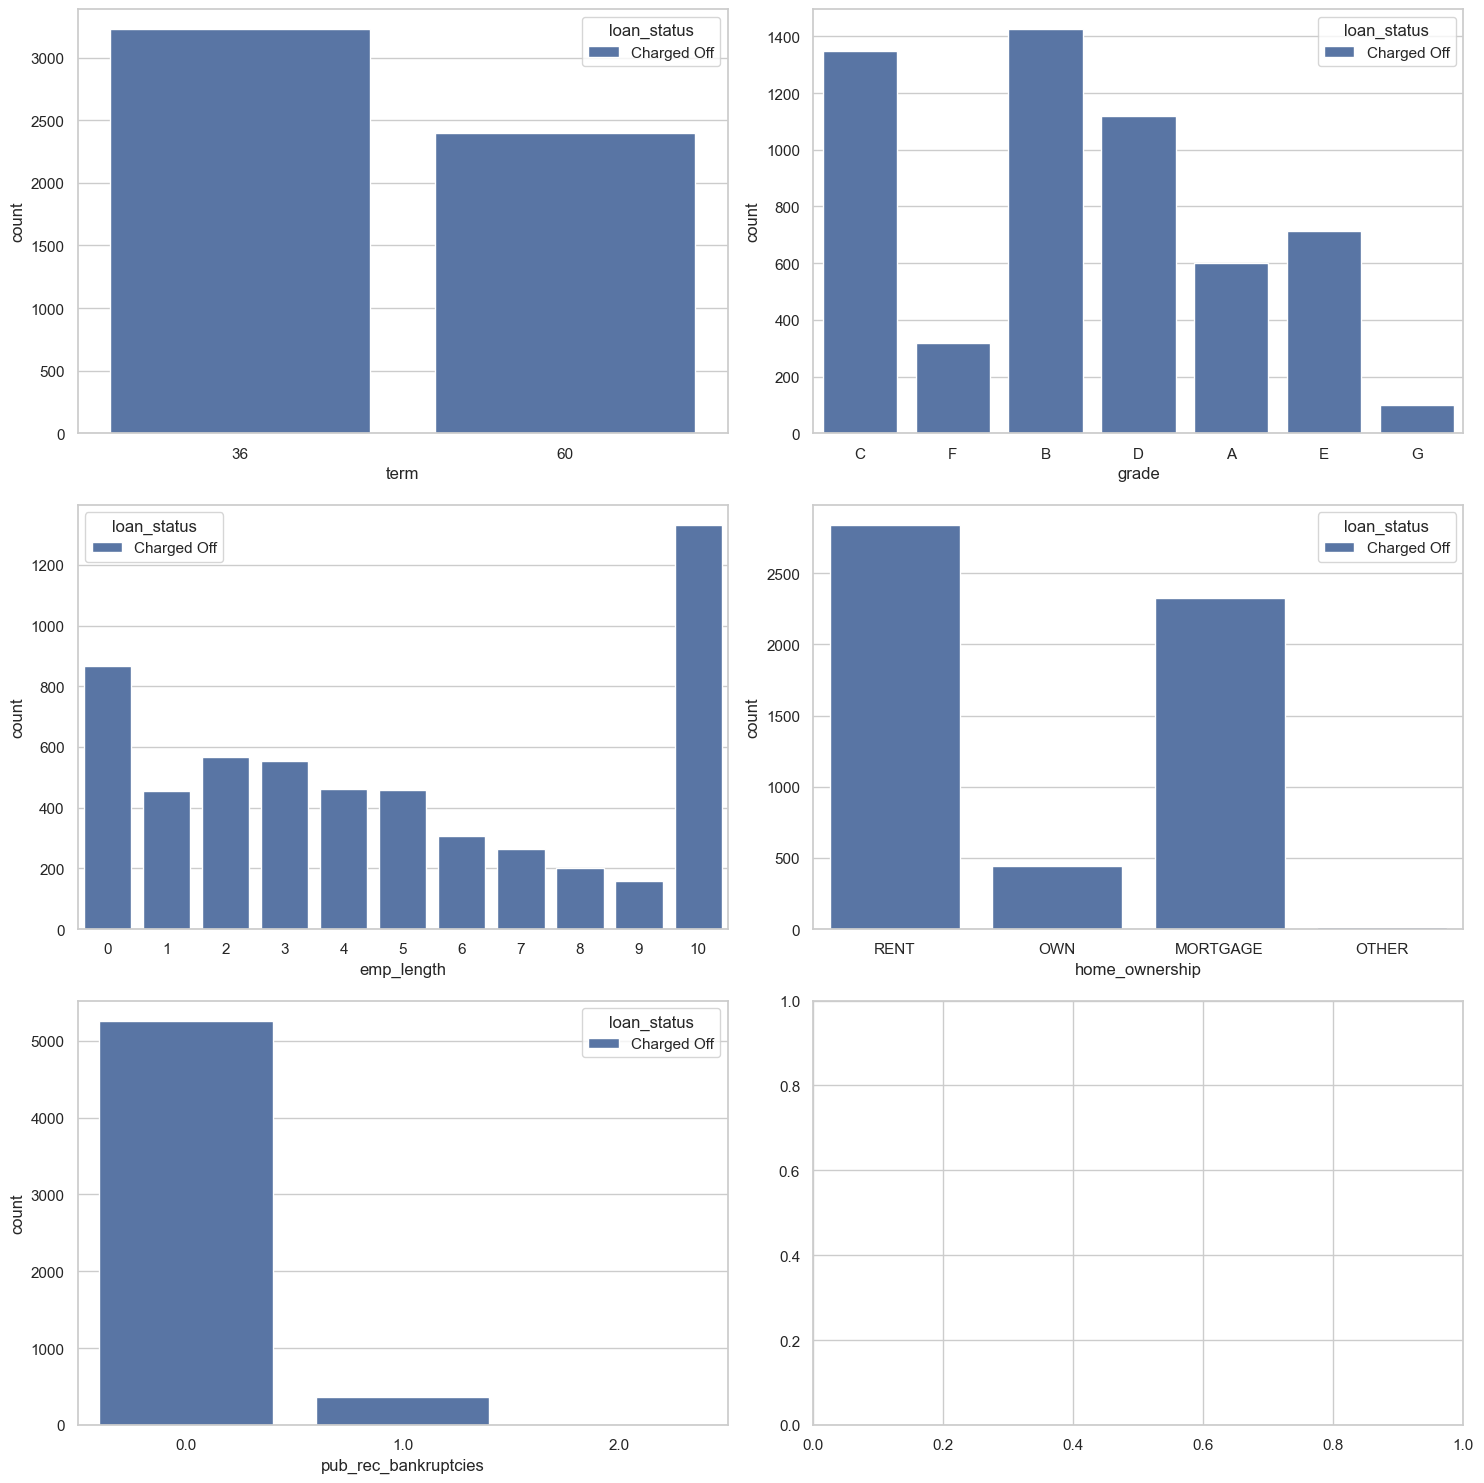

In [75]:
# Columns to plot
plot_columns = ['term', 'grade', 'emp_length', 'home_ownership', 'pub_rec_bankruptcies']

# Create a figure with subplots (8 plots in total)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))  # Adjust figsize to fit the plots

# Flatten axes array for easier iteration
axes = axes.flatten()

# Loop through the columns and plot
for i, col in enumerate(plot_columns):
    sns.countplot(data=df_charged_off, x=col, hue='loan_status', ax=axes[i])  # Assign each plot to the correct axis

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

# 'int_rate' -> create seperate
# 'dti'
# 'purpose'

Plotting the loan amount with charged off

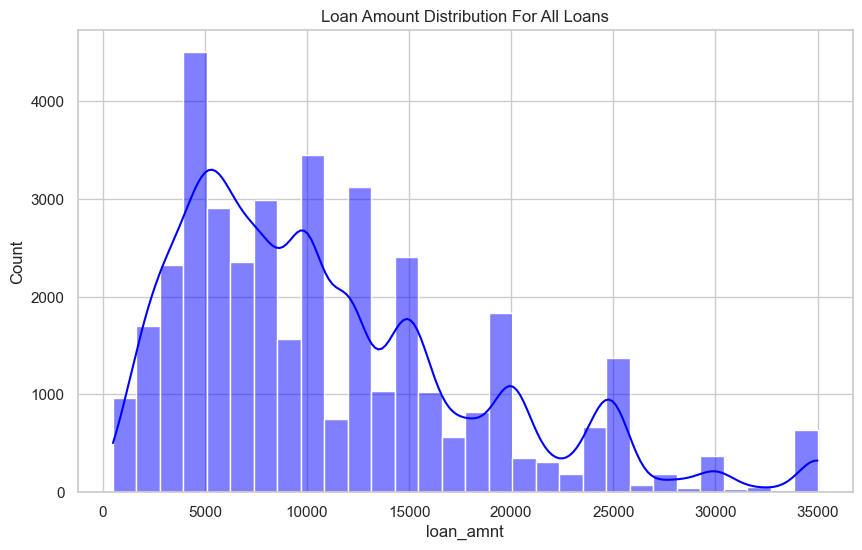

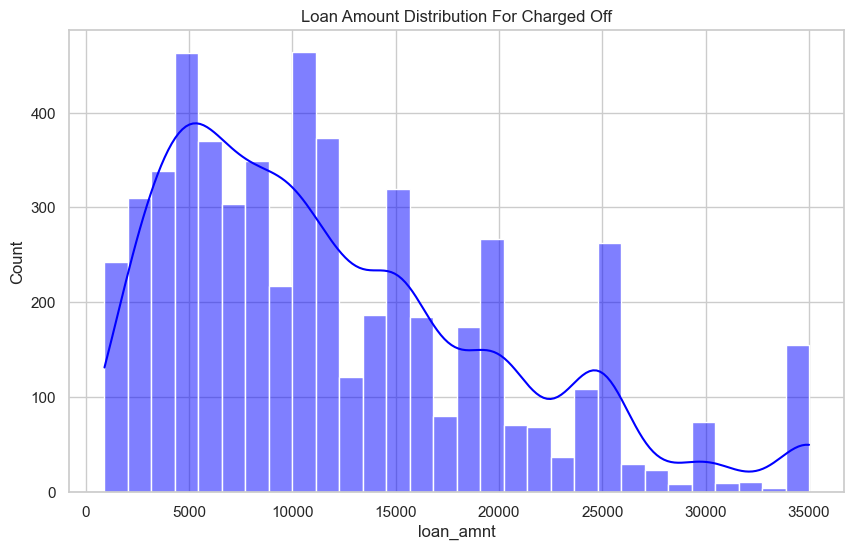

In [93]:
# Plot 1: Loan amount Distribution for All Loans
plt.figure(figsize=(10, 6))
sns.histplot(df1['loan_amnt'], bins=30, kde=True, color='blue')
plt.title("Loan Amount Distribution For All Loans")
plt.show()

# Plot 2: Loan amount Distribution for Charged Off Loans
plt.figure(figsize=(10, 6))
sns.histplot(df_charged_off['loan_amnt'], bins=30, kde=True, color='blue')
plt.title("Loan Amount Distribution For Charged Off")
plt.show()


Plotting the purpose of loan with charged off

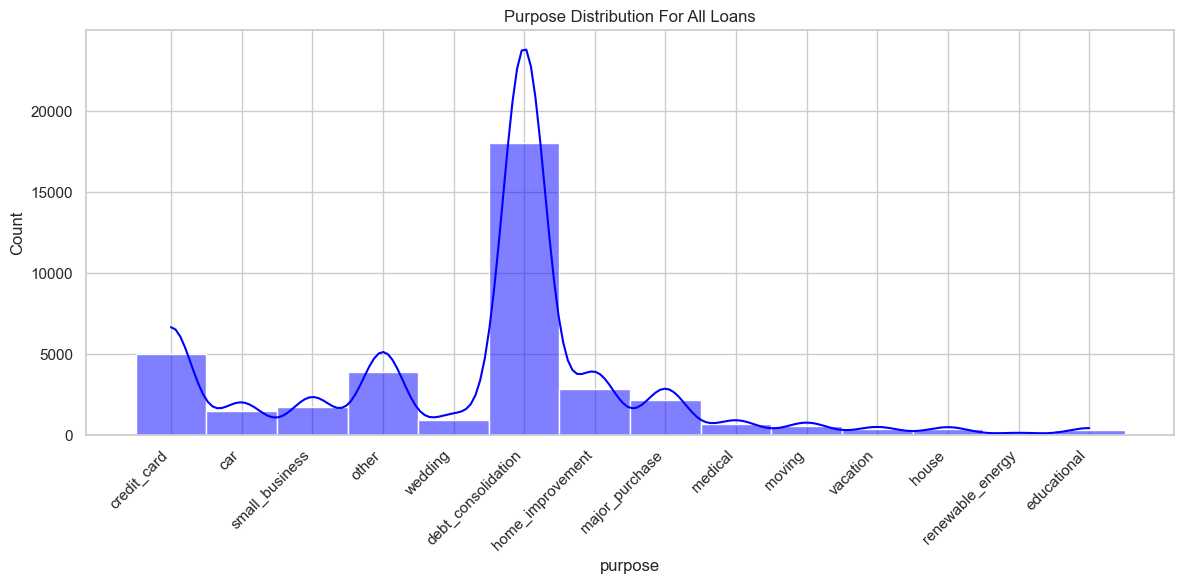

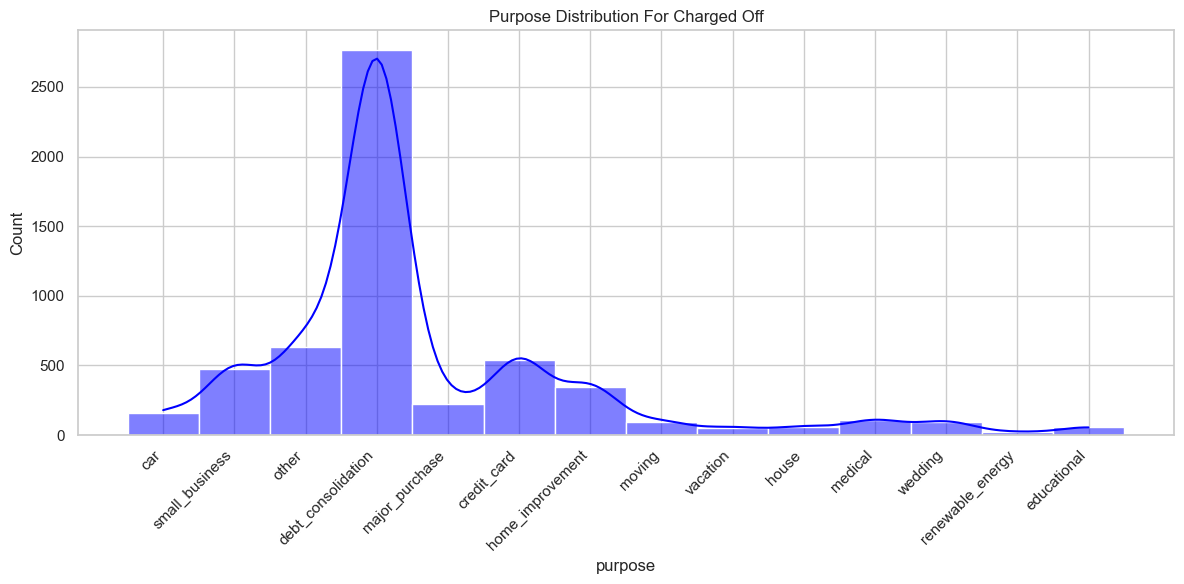

In [83]:
# Plotting the purpose of loan with charged off
purpose_order = df1['purpose'].value_counts().index

# Plot 1: Purpose Distribution for All Loans
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
sns.histplot(df1['purpose'], bins=30, kde=True, color='blue', hue_order=purpose_order)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels more (45 degrees) for better visibility
plt.title("Purpose Distribution For All Loans")
plt.tight_layout()  # Adjust the layout to prevent clipping
plt.show()

# Plot 2: Purpose Distribution for Charged Off Loans
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
sns.histplot(df_charged_off['purpose'], bins=30, kde=True, color='blue', hue_order=purpose_order)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels more (45 degrees) for better visibility
plt.title("Purpose Distribution For Charged Off")
plt.tight_layout()  # Adjust the layout to prevent clipping
plt.show()


Interest Rate Distribution Plot

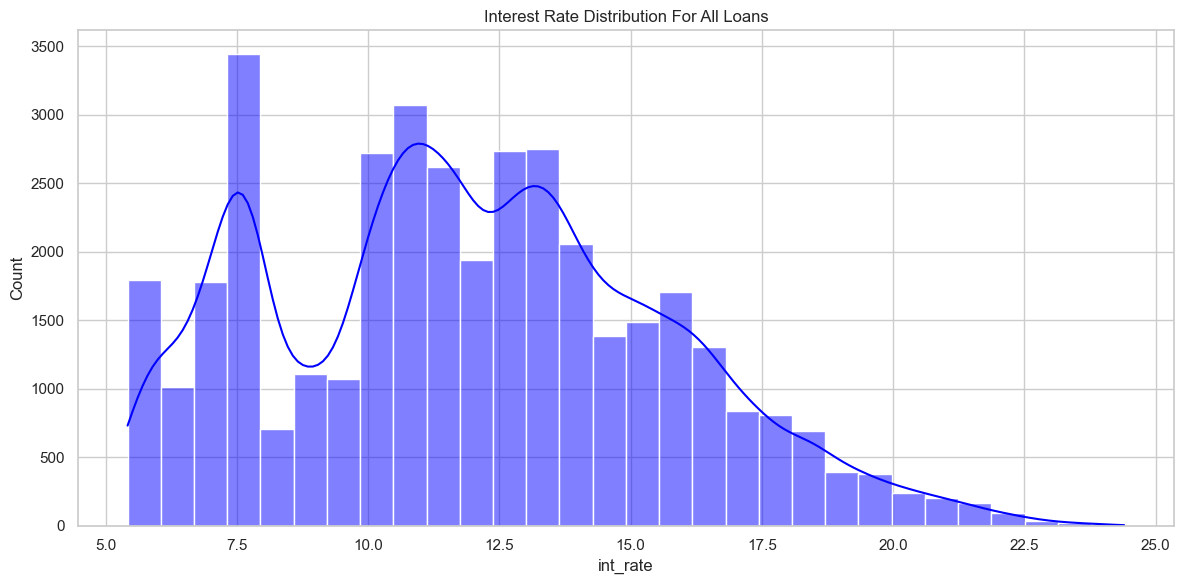

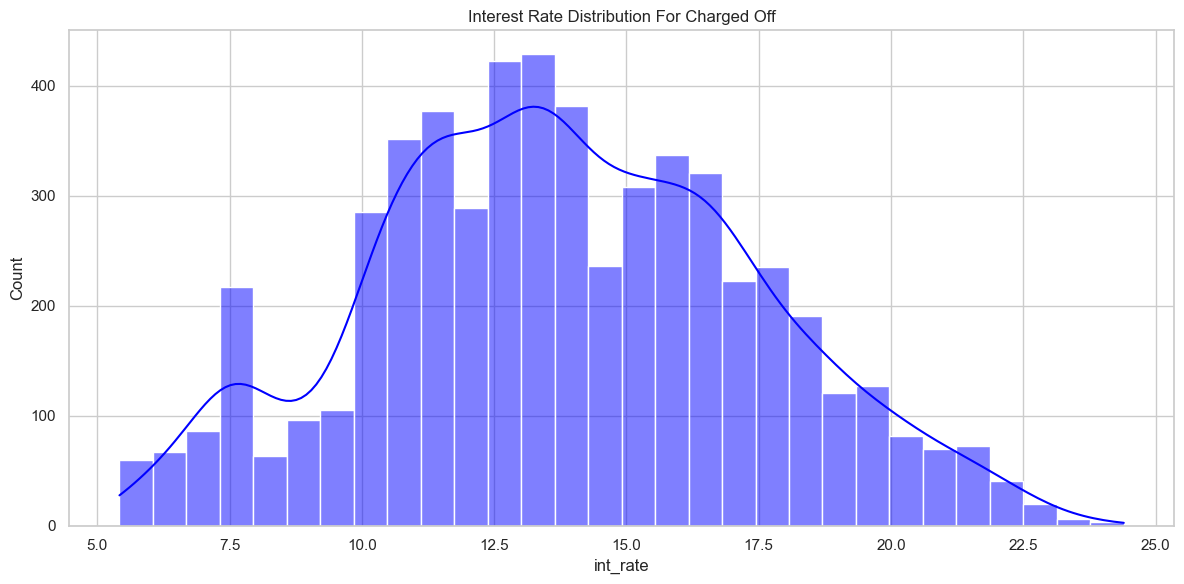

In [94]:
# Plot 1: Interest Rate Distribution for All Loans
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
sns.histplot(df1['int_rate'], bins=30, kde=True, color='blue')
plt.title("Interest Rate Distribution For All Loans")
plt.tight_layout()  # Adjust the layout to prevent clipping
plt.show()

# Plot 2: Interest Rate Distribution for Charged Off Loans
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
sns.histplot(df_charged_off['int_rate'], bins=30, kde=True, color='blue')
plt.title("Interest Rate Distribution For Charged Off")
plt.tight_layout()  # Adjust the layout to prevent clipping
plt.show()

Debt To Income ration distribution chart plot

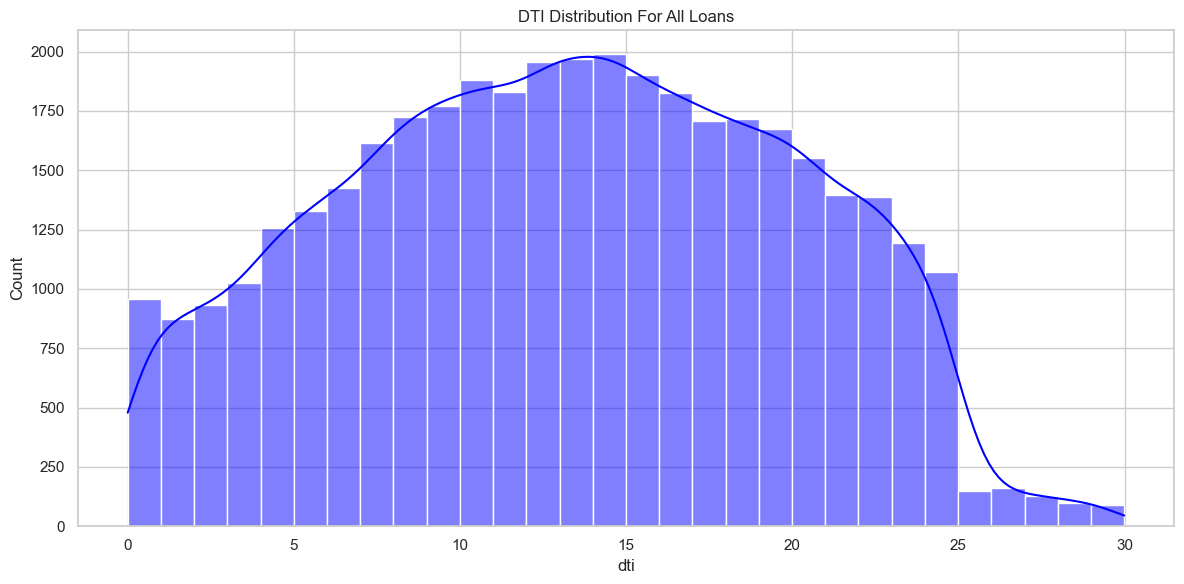

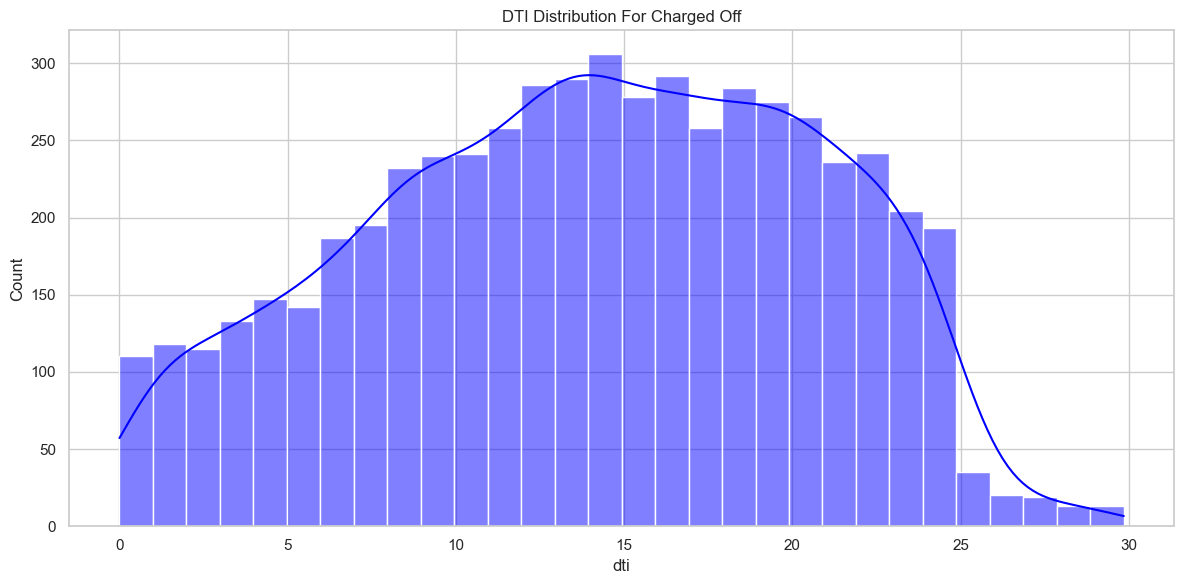

In [95]:
# Plot 1: DTI Distribution for All Loans DTI
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
sns.histplot(df1['dti'], bins=30, kde=True, color='blue')
plt.title("DTI Distribution For All Loans")
plt.tight_layout()  # Adjust the layout to prevent clipping
plt.show()

# Plot 2: DTI Distribution for Charged Off Loans DTI
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
sns.histplot(df_charged_off['dti'], bins=30, kde=True, color='blue')
plt.title("DTI Distribution For Charged Off")
plt.tight_layout()  # Adjust the layout to prevent clipping
plt.show()

# Bivariate Analysis

Create a line plot to visualize the mean loan amount by LTI

<Figure size 1000x600 with 0 Axes>

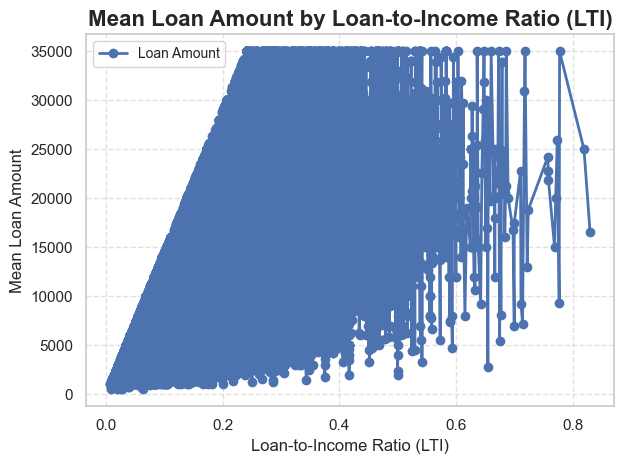

In [124]:
plt.figure(figsize=(10, 6))  # Adjust the figure size for better clarity
ax = grouped_summary.plot(x='LTI', y='loan_amnt', kind='line', color='b', marker='o', linestyle='-', linewidth=2, markersize=6)

# Add a title with improved formatting
plt.title('Mean Loan Amount by Loan-to-Income Ratio (LTI)', fontsize=16, weight='bold')

# Add labels for x and y axes
plt.xlabel('Loan-to-Income Ratio (LTI)', fontsize=12)
plt.ylabel('Mean Loan Amount', fontsize=12)

# Display a grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Add a legend (optional, since we only have one line in this case)
plt.legend(['Loan Amount'], loc='upper left', fontsize=10)

# Make sure to adjust the layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

Box Plot between Loan Status and Annual Income

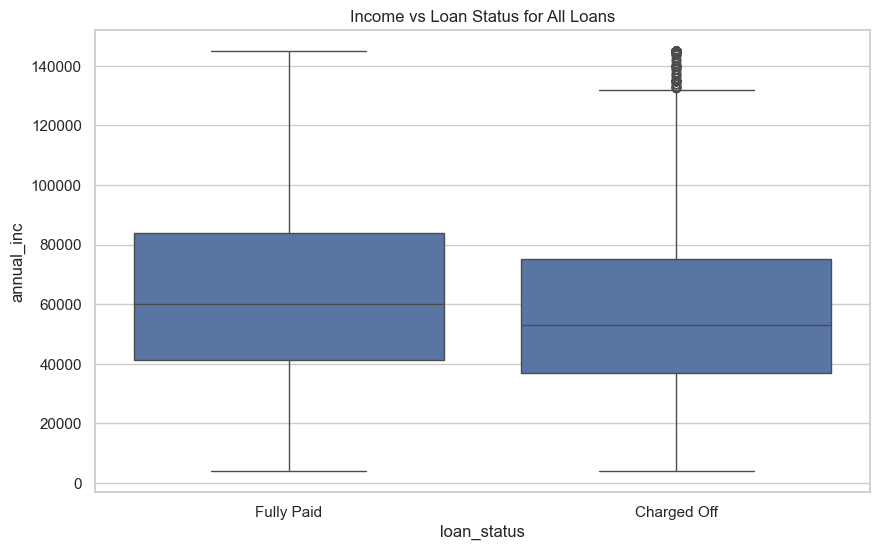

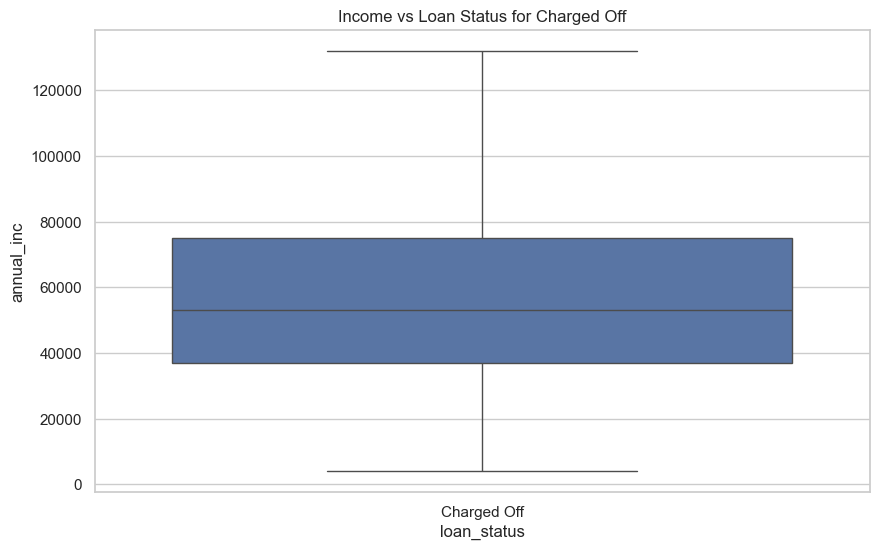

In [82]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='annual_inc', data=df1)
plt.title("Income vs Loan Status for All Loans")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='annual_inc', data=df_charged_off)
plt.title("Income vs Loan Status for Charged Off")
plt.show()


Bar Plot for Puprose and Loan Amount

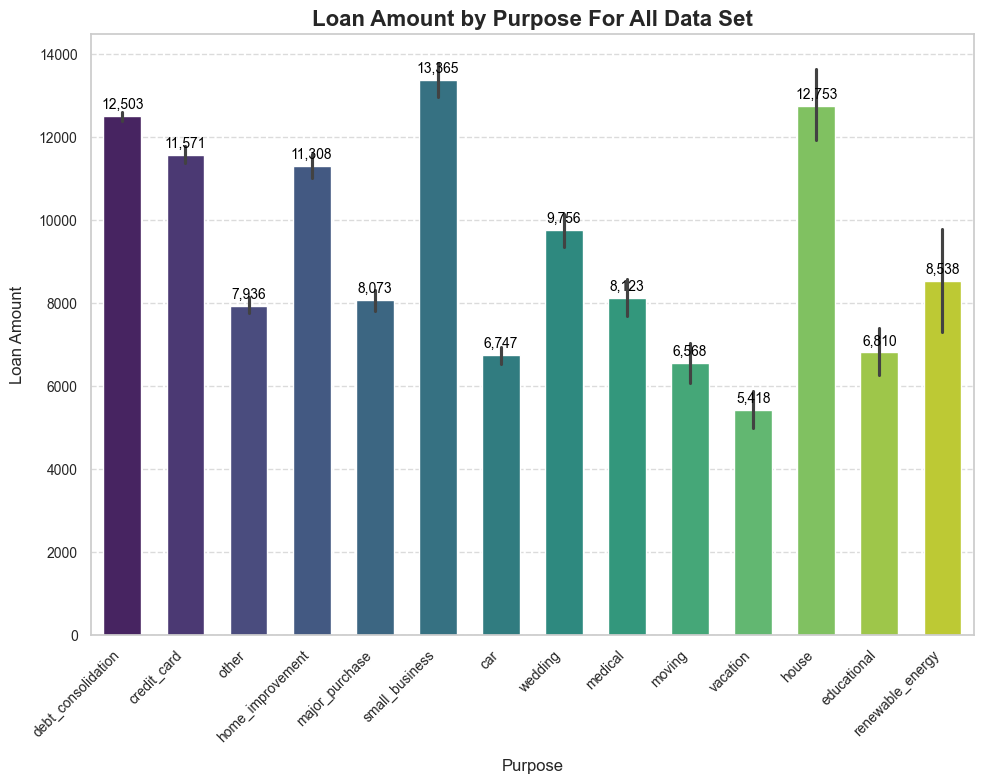

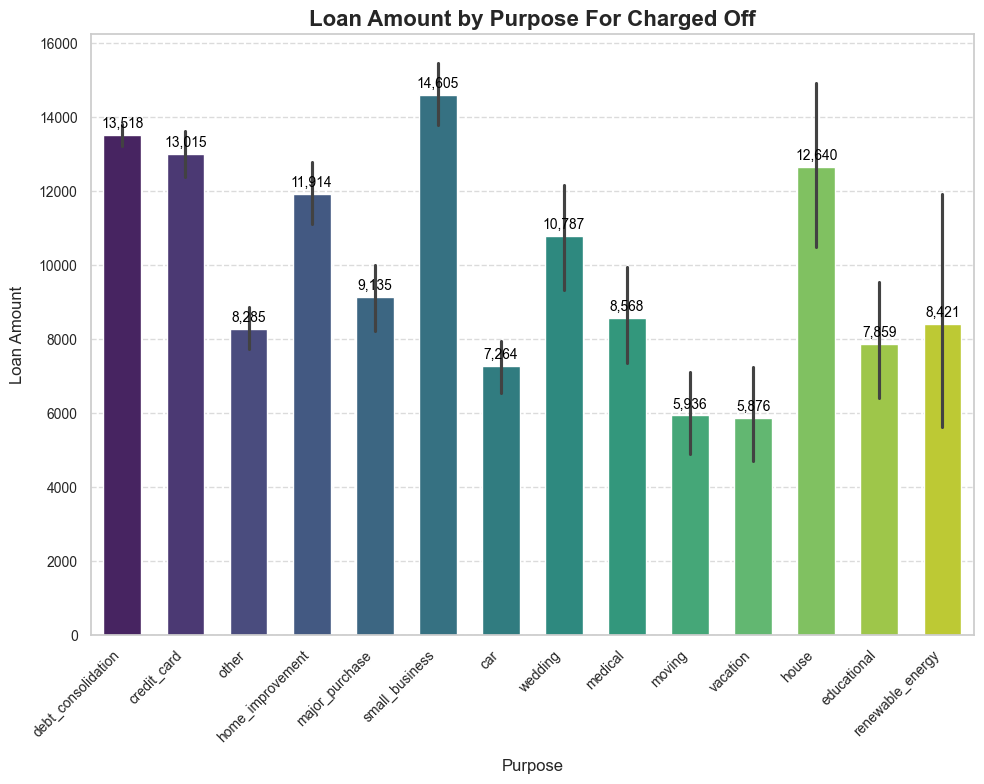

In [91]:
# loan_amt_threshold = [5000,10000,15000]
# loan_amt_labels  = ['0 - 5K', '5K - 10K', '10K - 15K', '15K - above']
# bucket_data = 
# df['loan_amt_bucket'] = df['loan_amt'].apply(bucket_data, args=(loan_amt_thresholds, loan_amt_labels))
# df[['loan_amt', 'loan_amt_bucket']]
purpose_order = df1['purpose'].value_counts().index

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 8))  # Increase figure size for better visibility

# Bar plot with adjusted width for wider gaps between bars
ax = sns.barplot(data=df1, x='purpose', y='loan_amnt', palette='viridis', width=0.6, order=purpose_order)

# Adding value annotations above each bar with better formatting
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():,.0f}',  # Format numbers with commas
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=10, color='black', xytext=(0, 8),
        textcoords='offset points'
    )

# Improve x-axis readability
plt.xticks(rotation=45, fontsize=10, ha='right')  # Rotate labels for better spacing
plt.yticks(fontsize=10)

# Adding labels and title with improved font sizes
plt.title("Loan Amount by Purpose For All Data Set", fontsize=16, weight='bold')
plt.xlabel("Purpose", fontsize=12, labelpad=10)  # Add padding for better spacing
plt.ylabel("Loan Amount", fontsize=12, labelpad=10)

# Adding gridlines for better data comprehension
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjusting layout for clarity
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------------------------

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 8))  # Increase figure size for better visibility

# Bar plot with adjusted width for wider gaps between bars
ax = sns.barplot(data=df_charged_off, x='purpose', y='loan_amnt', palette='viridis', width=0.6, order=purpose_order)

# Adding value annotations above each bar with better formatting
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():,.0f}',  # Format numbers with commas
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=10, color='black', xytext=(0, 8),
        textcoords='offset points'
    )

# Improve x-axis readability
plt.xticks(rotation=45, fontsize=10, ha='right')  # Rotate labels for better spacing
plt.yticks(fontsize=10)

# Adding labels and title with improved font sizes
plt.title("Loan Amount by Purpose For Charged Off", fontsize=16, weight='bold')
plt.xlabel("Purpose", fontsize=12, labelpad=10)  # Add padding for better spacing
plt.ylabel("Loan Amount", fontsize=12, labelpad=10)

# Adding gridlines for better data comprehension
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjusting layout for clarity
plt.tight_layout()
plt.show()

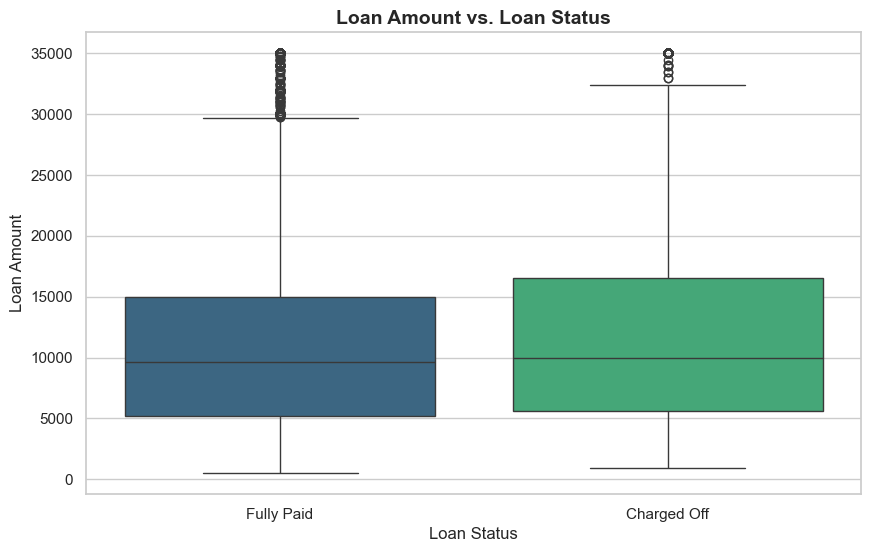

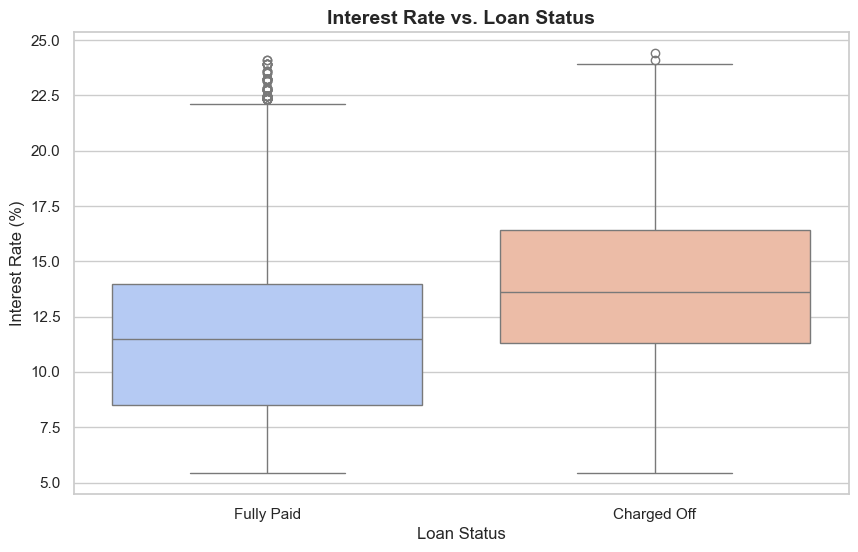

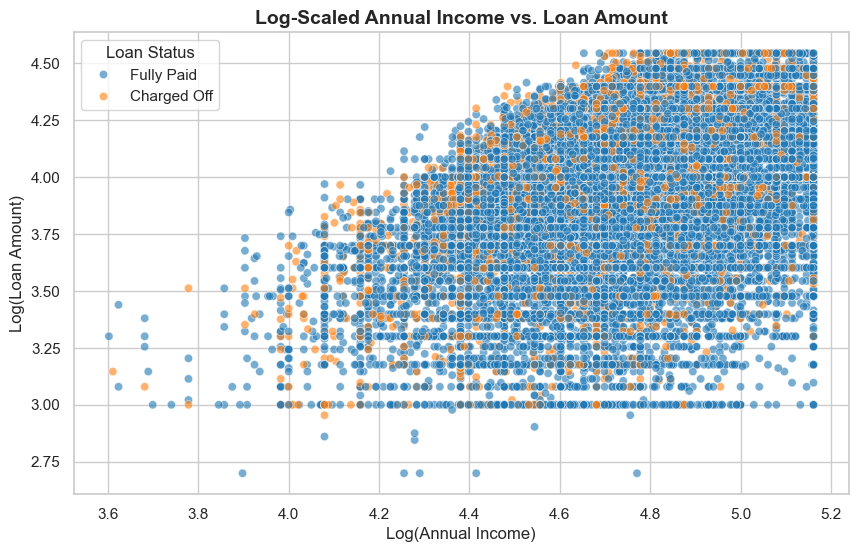

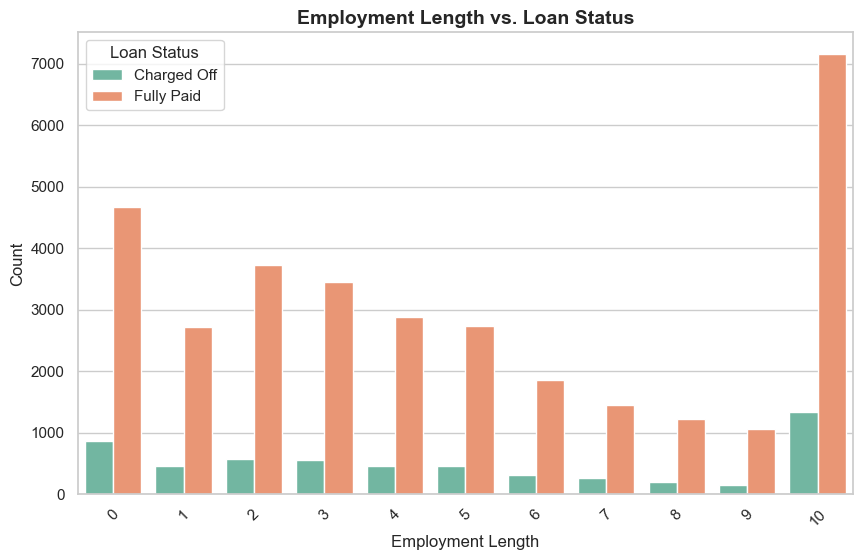

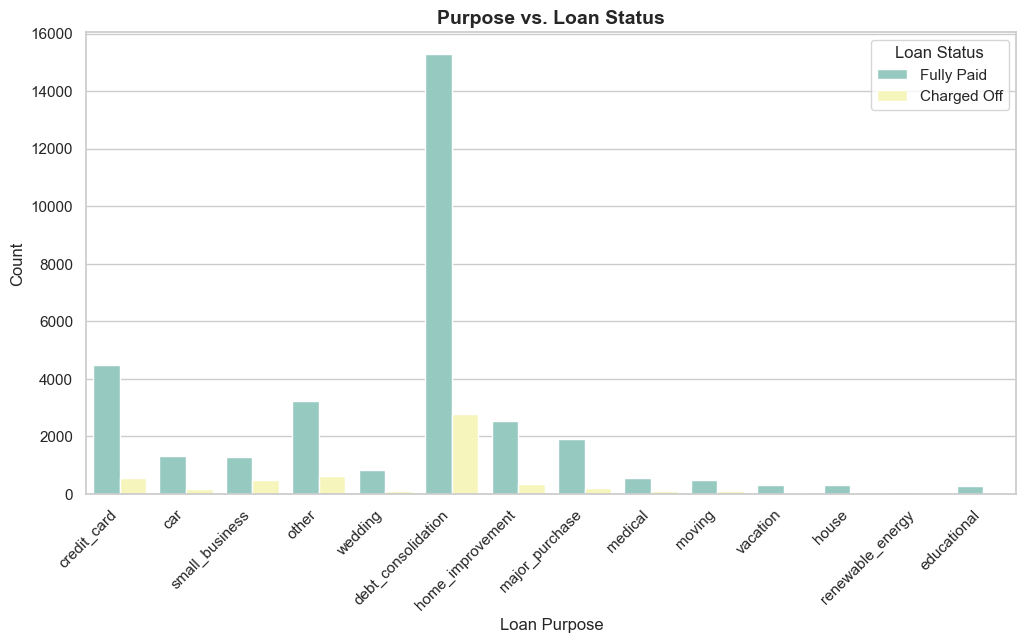

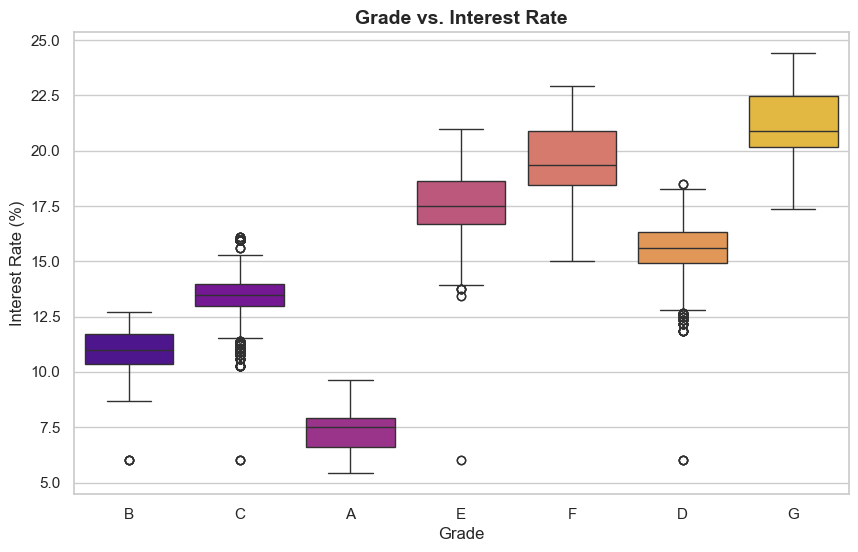

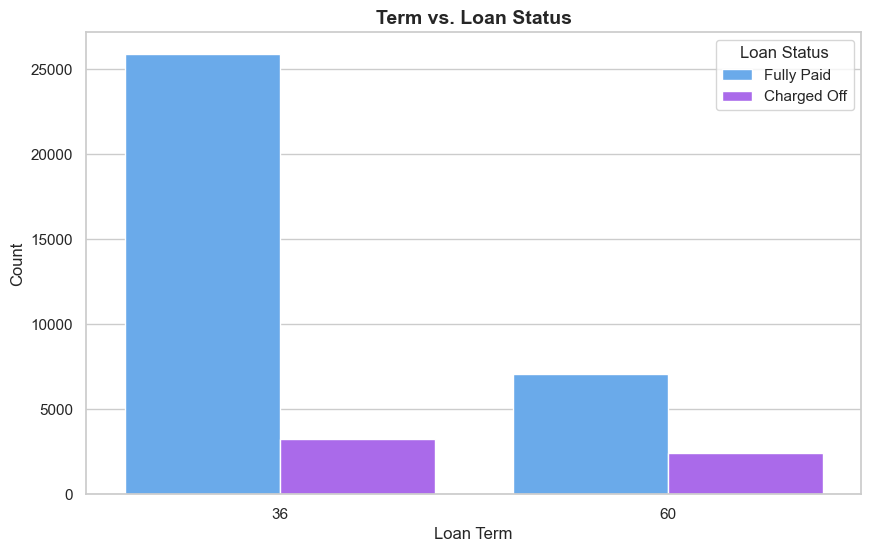

In [101]:
# Set general aesthetics for all plots
sns.set_theme(style="whitegrid")

# 1. Loan Amount vs. Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='loan_status', y='loan_amnt', palette='viridis')
plt.title("Loan Amount vs. Loan Status", fontsize=14, weight='bold')
plt.xlabel("Loan Status", fontsize=12)
plt.ylabel("Loan Amount", fontsize=12)
plt.show()

# 2. Interest Rate vs. Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='loan_status', y='int_rate', palette='coolwarm')
plt.title("Interest Rate vs. Loan Status", fontsize=14, weight='bold')
plt.xlabel("Loan Status", fontsize=12)
plt.ylabel("Interest Rate (%)", fontsize=12)
plt.show()

# 3. Annual Income vs. Loan Amount
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=df1, x='annual_inc', y='loan_amnt', hue='loan_status', palette='tab10', alpha=0.6)
# plt.title("Annual Income vs. Loan Amount", fontsize=14, weight='bold')
# plt.xlabel("Annual Income", fontsize=12)
# plt.ylabel("Loan Amount", fontsize=12)
# plt.legend(title="Loan Status")
# plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df1,
    x=np.log10(df1['annual_inc'] + 1),  # Adding 1 to avoid log(0)
    y=np.log10(df1['loan_amnt'] + 1),
    hue='loan_status',
    palette='tab10',
    alpha=0.6
)
plt.title("Log-Scaled Annual Income vs. Loan Amount", fontsize=14, weight='bold')
plt.xlabel("Log(Annual Income)", fontsize=12)
plt.ylabel("Log(Loan Amount)", fontsize=12)
plt.legend(title="Loan Status")
plt.show()

# 4. Employment Length vs. Loan Status
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, x='emp_length', hue='loan_status', palette='Set2')
plt.title("Employment Length vs. Loan Status", fontsize=14, weight='bold')
plt.xlabel("Employment Length", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Loan Status")
plt.show()

# 5. Purpose vs. Loan Status
plt.figure(figsize=(12, 6))
sns.countplot(data=df1, x='purpose', hue='loan_status', palette='Set3')
plt.title("Purpose vs. Loan Status", fontsize=14, weight='bold')
plt.xlabel("Loan Purpose", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Loan Status")
plt.show()

# 6. Grade vs. Interest Rate
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='grade', y='int_rate', palette='plasma')
plt.title("Grade vs. Interest Rate", fontsize=14, weight='bold')
plt.xlabel("Grade", fontsize=12)
plt.ylabel("Interest Rate (%)", fontsize=12)
plt.show()

# 7. Term vs. Loan Status
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, x='term', hue='loan_status', palette='cool')
plt.title("Term vs. Loan Status", fontsize=14, weight='bold')
plt.xlabel("Loan Term", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Loan Status")
plt.show()

# Multivariate Analysis

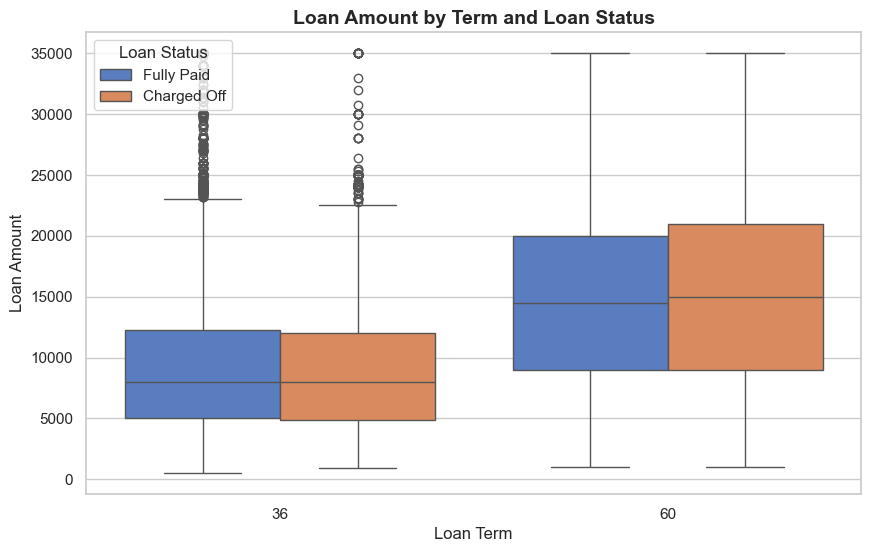

In [102]:
# Loan Amount, Term, and Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df1,
    x='term',
    y='loan_amnt',
    hue='loan_status',
    palette='muted'
)
plt.title("Loan Amount by Term and Loan Status", fontsize=14, weight='bold')
plt.xlabel("Loan Term", fontsize=12)
plt.ylabel("Loan Amount", fontsize=12)
plt.legend(title="Loan Status", loc="upper left")
plt.show()

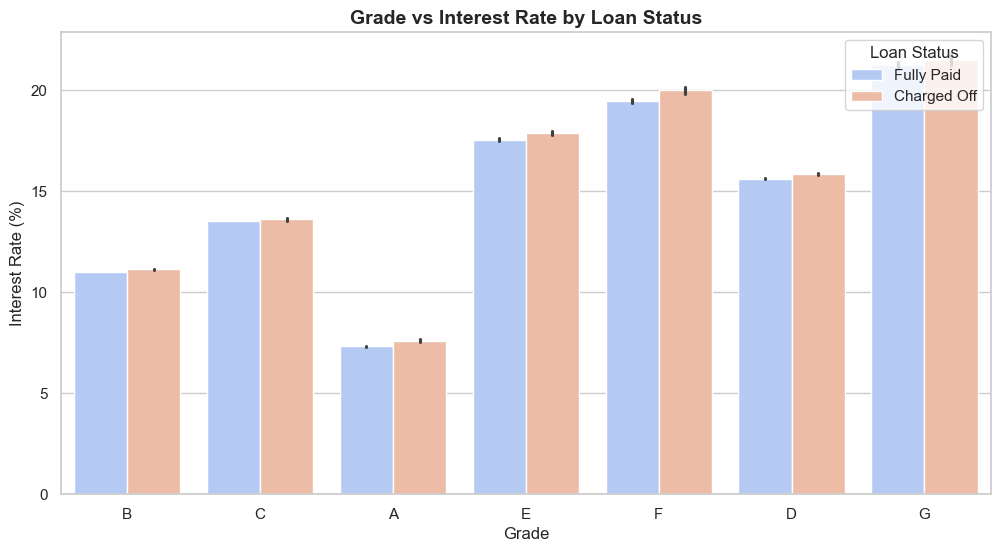

In [103]:
# Grade, Interest Rate, and Loan Status
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df1,
    x='grade',
    y='int_rate',
    hue='loan_status',
    palette='coolwarm'
)
plt.title("Grade vs Interest Rate by Loan Status", fontsize=14, weight='bold')
plt.xlabel("Grade", fontsize=12)
plt.ylabel("Interest Rate (%)", fontsize=12)
plt.legend(title="Loan Status", loc="upper right")
plt.show()

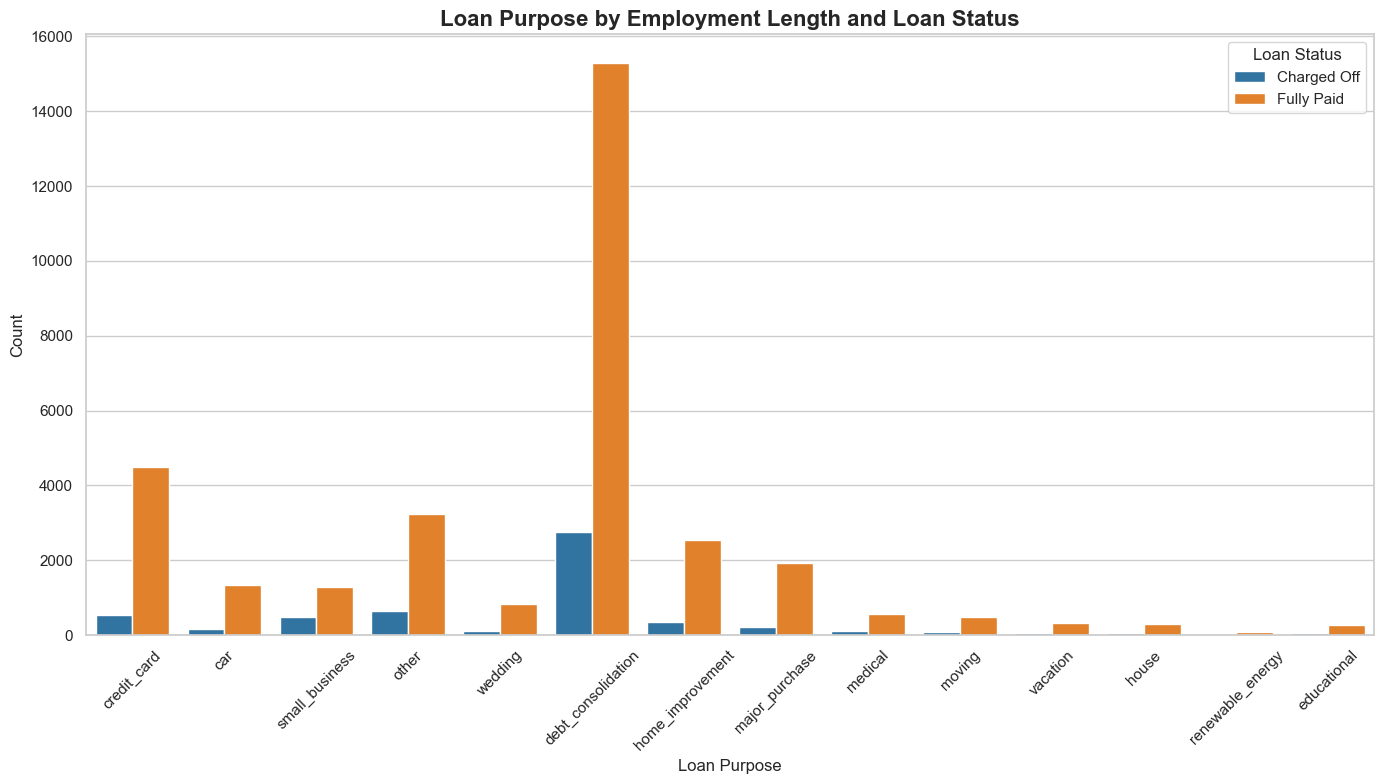

In [116]:
# Purpose, Employment Length, and Loan Status

plt.figure(figsize=(14, 8))

# Create a count plot with employment length and loan status
sns.countplot(
    data=df1,
    x='purpose',
    hue='loan_status',
    palette='tab10',
    hue_order=['Charged Off', 'Fully Paid'],
    dodge=True
)

# Add employment length as a facet (split by 'emp_length')
plt.title("Loan Purpose by Employment Length and Loan Status", fontsize=16, weight='bold')
plt.xlabel("Loan Purpose", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Loan Status", loc="upper right")

plt.tight_layout()
plt.show()

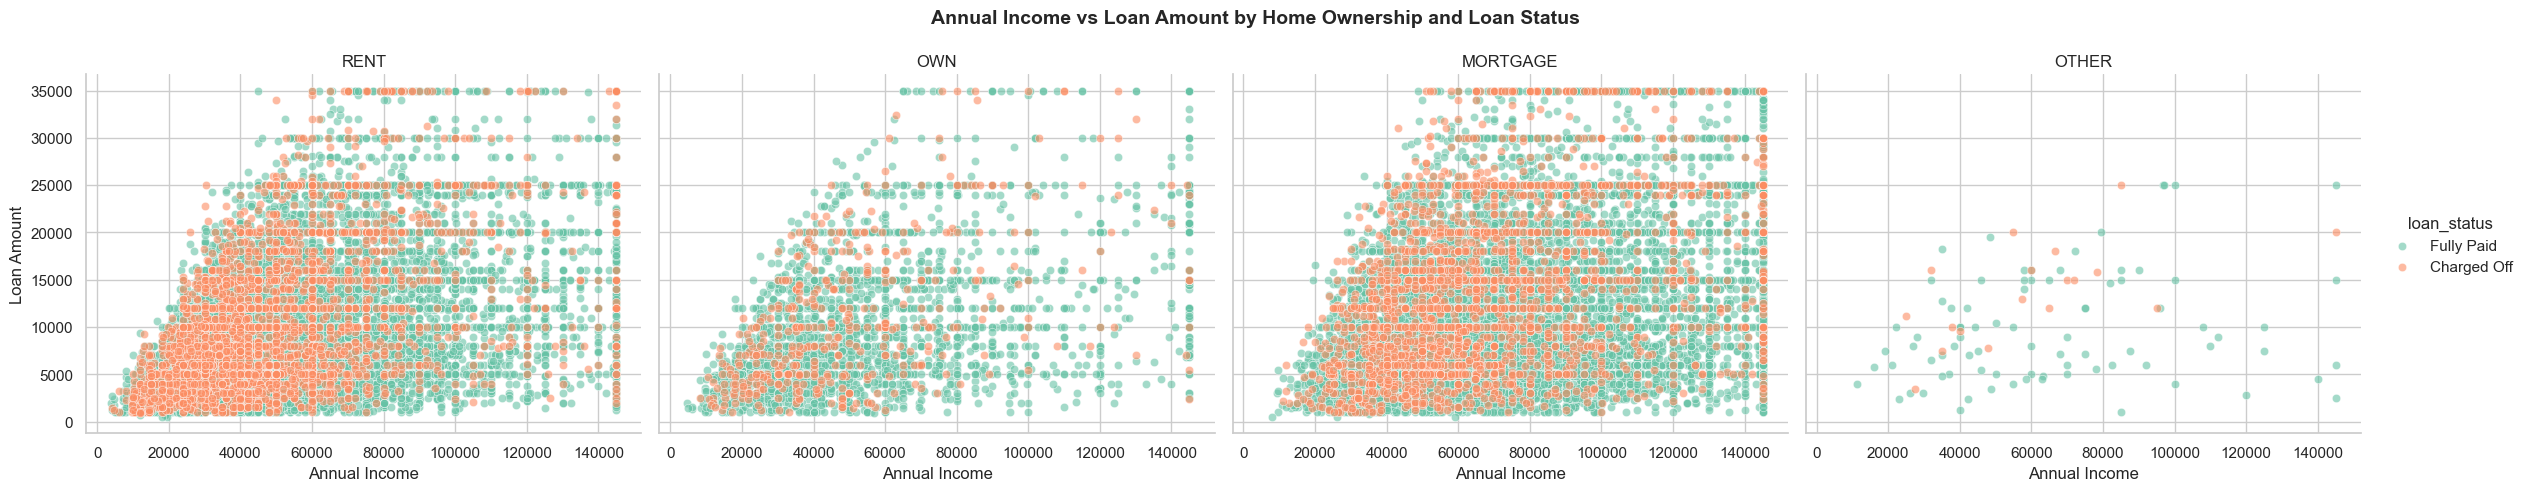

In [105]:
# Annual Income, Home Ownership, and Loan Status
g = sns.FacetGrid(
    df1,
    col="home_ownership",
    hue="loan_status",
    height=5,
    aspect=1.2,
    palette="Set2"
)
g.map(
    sns.scatterplot,
    "annual_inc",
    "loan_amnt",
    alpha=0.6
)
g.add_legend()
g.set_titles("{col_name}")
g.set_axis_labels("Annual Income", "Loan Amount")
g.fig.suptitle("Annual Income vs Loan Amount by Home Ownership and Loan Status", fontsize=14, weight='bold')
plt.subplots_adjust(top=0.85)
plt.show()

# Correlation analysis

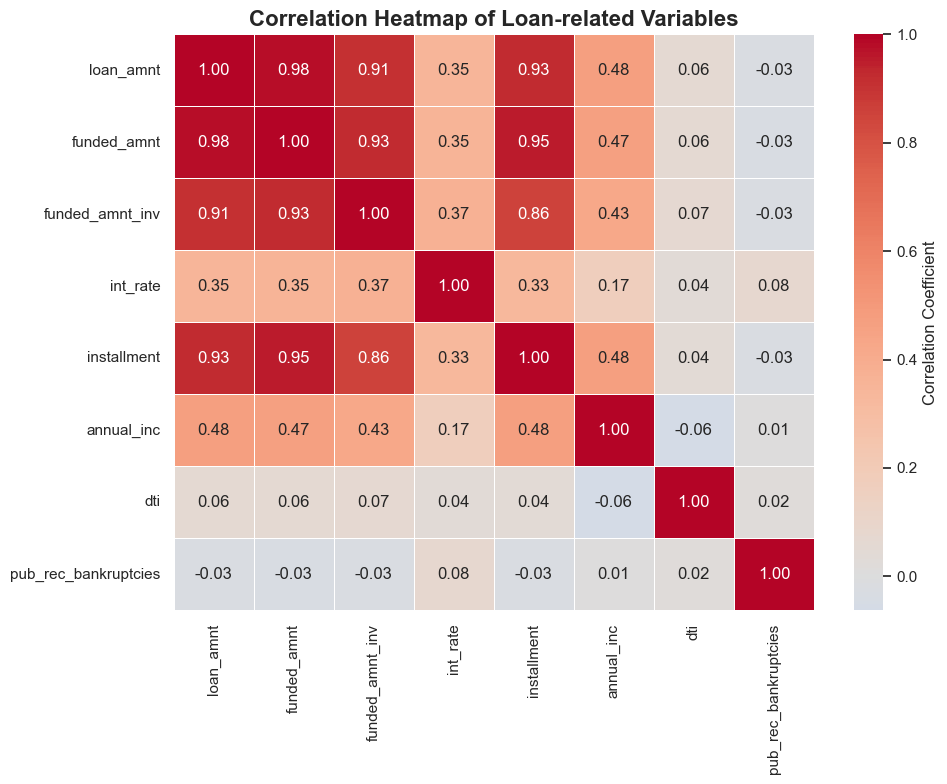

In [118]:
# Select the relevant numeric columns for correlation analysis
numeric_columns = [
    'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 
    'installment', 'annual_inc', 'dti', 'pub_rec_bankruptcies'
]

# Compute the correlation matrix
corr_matrix = df_charged_off[numeric_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with correlation matrix
sns.heatmap(
    corr_matrix, 
    annot=True,       # Annotate with correlation coefficients
    cmap='coolwarm',  # Color map for correlation values
    center=0,         # Set the center at 0 for better visualization
    linewidths=0.5,   # Add line between cells
    fmt='.2f',        # Format for the correlation coefficient
    cbar_kws={'label': 'Correlation Coefficient'}  # Label for the color bar
)

# Title for the heatmap
plt.title("Correlation Heatmap of Loan-related Variables", fontsize=16, weight='bold')

# Show the plot
plt.tight_layout()
plt.show()